# 머신러닝을 이용한 투자전략 : ETF상승하락예측

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 밑에 실행하면서 뜨는 빨간 경고 팝업 뜨지 않게 하기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib   # 한국어 출력되게 
import os
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [3]:
data = pd.read_csv("./data/ETFs_main.csv")
data

,Dates,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO
0,2007-02-20,146.04,145.56,146.200,144.0,56909500.0,65.31,83.51,2.3263,0.31,48.67,25.07,10.24,40.055
1,2007-02-21,145.98,145.61,146.070,145.0,63971500.0,67.28,82.90,2.3653,0.32,49.86,25.12,10.20,39.975
2,2007-02-22,145.87,146.05,146.420,145.0,79067398.0,67.15,82.46,2.3871,0.31,50.33,25.12,10.18,40.220
3,2007-02-23,145.30,145.74,145.790,145.0,71962797.0,67.72,82.78,2.3809,0.31,50.46,25.04,10.58,40.035
4,2007-02-26,145.17,145.83,145.950,145.0,69320062.0,68.10,83.08,2.3795,0.31,50.90,25.04,11.15,39.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.87,1.7807,0.48,9.72,25.77,28.38,38.180
2767,2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.87,1.7651,0.48,9.57,25.94,30.11,37.870
2768,2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.55,1.7505,0.40,9.29,25.55,36.07,37.320
2769,2018-12-27,248.07,242.57,248.290,239.0,186267297.0,120.57,86.00,1.7581,0.44,9.62,25.57,29.96,37.900


In [4]:
data.columns

Index(['Dates', 'CLOSE_SPY', 'OPEN', 'HIGH', 'LOW', 'VOLUME', 'CLOSE_GLD',
       'CLOSE_FXY', 'CLOSE_T10Y2Y', 'CLOSE_TED', 'CLOSE_USO', 'CLOSE_UUP',
       'CLOSE_VIX', 'CLOSE_VWO'],
      dtype='object')

## 칼럼 설명

- CLOSE_SPY: SPY(S&P 500 ETF)의 종가. SPY는 S&P 500 지수를 추종하는 ETF로, 미국 주식시장의 전반적인 성과를 반영합니다.
- 추가 설명: SPY는 미국의 대표적인 주가지수 ETF로, S&P 500에 속한 500대 대형주들의 가격 변동을 추적합니다. 투자자들이 미국 경제 전반에 대한 노출을 원할 때 많이 사용하는 대표적인 ETF입니다.
<br><br>
- OPEN: SPY의 시가. 거래가 시작될 때의 가격을 의미합니다.
- 추가 설명: 시가는 거래일의 첫 거래가 이루어지는 순간의 가격입니다. 시가와 종가의 차이는 주가가 하루 동안 어떤 방향으로 변동했는지를 알 수 있게 해줍니다.
<br><br>
- HIGH: SPY의 고가. 해당 거래일 동안 기록된 가장 높은 가격입니다.
- 추가 설명: 고가는 특정 거래일 동안의 최대 가격을 의미하며, 투자자들의 수요가 크게 증가했을 때 기록됩니다. 이는 시장의 관심과 구매가 강했음을 보여줍니다.
<br><br>
- LOW: SPY의 저가. 해당 거래일 동안 기록된 가장 낮은 가격입니다.
- 추가 설명: 저가는 해당 거래일 동안 기록된 최저 가격으로, 주식이 가장 약세를 보였던 시점을 나타냅니다. 저가와 고가의 차이는 변동성의 크기를 가늠하는 데 유용합니다.
<br><br>
- VOLUME: SPY의 거래량. 해당 거래일 동안 주식이 얼마나 많이 거래되었는지를 나타냅니다.
- 추가 설명: 거래량은 해당 주식의 유동성과 시장 참여자의 관심을 보여줍니다. 거래량이 높다면 해당 주식에 대한 관심이 높고, 거래량이 적다면 상대적으로 거래가 활발하지 않다는 의미입니다.
<br><br>
- CLOSE_GLD: GLD(Gold ETF)의 종가. 금 가격을 추종하는 ETF로, 금의 시장 가격을 반영합니다.
- 추가 설명: GLD는 금에 투자하고 싶지만 실물 금을 보유하지 않고 금 가격에 따라 움직이는 ETF를 통해 간접적으로 투자할 수 있는 방법입니다. 금은 안전자산으로 인식되기 때문에, 글로벌 경제 위기나 불확실성이 있을 때 수요가 증가하는 경향이 있습니다.
<br><br>
- CLOSE_FXY: FXY(Japanese Yen ETF)의 종가. 일본 엔화의 성과를 추종하는 ETF입니다.
- 추가 설명: FXY는 일본 엔화의 환율 변동을 추종합니다. 엔화는 국제 금융시장에서 안전자산으로 여겨지며, 글로벌 시장의 불확실성이 커질 때 엔화의 가치는 상승하는 경향이 있습니다.
<br><br>
- CLOSE_T10Y2Y: 10년 만기 미국 국채와 2년 만기 국채 간의 금리 차이를 나타내는 지표입니다. 일반적으로 경기 예측에 사용됩니다.
- 추가 설명: 이 금리 차이(일명 수익률 곡선)는 경기 침체의 예측 도구로 자주 사용됩니다. 일반적으로 장기 국채(10년)의 금리가 단기 국채(2년)보다 높지만, 역전이 발생하면 경기 침체 가능성이 있다고 해석됩니다.
<br><br>
- CLOSE_TED: TED 스프레드(TED Spread)로, 미국 3개월 만기 재무부채권 금리와 3개월 만기 유로달러 금리 차이를 나타냅니다. 금융시장의 위험을 측정하는 지표로 자주 사용됩니다.
- 추가 설명: TED 스프레드는 금융 위기가 다가올 때 급격히 상승하는 경향이 있습니다. 스프레드가 높아지면 금융기관 간의 신용 리스크가 높아지고, 자금 시장에서 불안정성이 증가한 것으로 해석됩니다.
<br><br>
- CLOSE_USO: USO(Crude Oil ETF)의 종가. 원유 가격을 추종하는 ETF입니다.
- 추가 설명: USO는 원유 가격에 투자하고자 하는 투자자들에게 인기가 있는 ETF입니다. 원유는 전 세계 경제에 중요한 역할을 하는 자원으로, 원유 가격은 공급과 수요, 지정학적 리스크 등에 민감하게 반응합니다.
<br><br>
- CLOSE_UUP: UUP(U.S. Dollar ETF)의 종가. 미국 달러 지수를 추종하는 ETF로, 달러의 가치 변동을 반영합니다.
- 추가 설명: UUP는 미국 달러의 강세 또는 약세에 투자할 수 있는 수단을 제공합니다. 국제 금융 시장에서 달러는 기축 통화로써 중요한 역할을 하며, 글로벌 경제 상황에 따라 달러의 가치가 변동합니다.
<br><br>
- CLOSE_VIX: VIX(Volatility Index) 종가. 흔히 '공포 지수'라고도 불리며, 시장의 변동성(주로 S&P 500의 향후 30일간의 예상 변동성)을 나타냅니다.
- 추가 설명: VIX는 시장의 변동성을 측정하는 지표로, VIX 지수가 높으면 시장이 불안정하고 투자자들이 리스크를 회피하려는 경향이 강하다는 신호입니다. VIX 지수는 20 이하일 때 상대적으로 안정된 시장을 의미하며, 30 이상일 때는 높은 변동성을 예상합니다.
<br><br>
- CLOSE_VWO: VWO(Emerging Markets ETF)의 종가. 신흥 시장 주식에 투자하는 ETF입니다.
- 추가 설명: VWO는 중국, 인도, 브라질 등 신흥 시장 경제에 대한 노출을 제공합니다. 신흥 시장은 성장 잠재력이 크지만 변동성 또한 높아, 투자자들은 리스크와 보상의 균형을 고려해야 합니다.
<br><br>

## 분석에 사용할 기술적 지표 만들기
- MA_45: 45일 단순 이동평균(Simple Moving Average): 특정 자산의 45일간 평균 증가

- VMA_45: 45일 거래량(Volume Moving Average): 지난 45일간의 평균 거래량

- RSI_14: 14일 상대강도지수(Relative Strength Index): 14일 동안의 자산 가격 변동을 바탕으로 과매수 또는 과매도 상태를 평가하는 지표


### RSI
RSI는 대표적인 모멘텀 지표 중 하나로, 주가의 평균 상승폭과 하락폭을 비교하여 가격의 상승 압력과 하락 압력 간의 상대적인 강도를 나타내는 기술적 지표이다. 현재의 시장 상황이 과매수 상태인지 아니면 과매도 상태인지 판단하기 위해 고안되었으며, 보통 RSI 70 이상을 과매수 상태로, RSI 30 이하를 과매도 상태로 판단하는 것이 일반적이다.

- RSI 값을 통해 상승 모멘텀과 하락 모멘텀의 강도를 확인할 수 있다.
- RSI 지표는 일정 기간 동안 상승 변화량과 하락 변화량의 비율을 나타낸다. 일정 기간 동안 주가의 상승폭이 하락폭보다 큰 경우, 즉 상승 모멘텀이 강한 경우 RSI 값이 높아지며, 반대의 경우 RSI 값이 낮아진다.
- RSI는 오실레이터의 성격을 갖는 지표로 0~100 사이의 값을 갖는다. RSI의 값이 100에 가까울 수록 최근 14일간 주가가 거의 100퍼센트 상승했다는 의미로, 현재 시장의 상방 모멘텀이 강하다는 해석이 가능하다.
- 반대로 RSI의 값이 0에 가까울수록 최근 14일간 주가가 거의 100퍼센트 하락했다는 의미로, 그만큼 현재 시장의 하방 모멘텀이 강하다고 볼 수 있다.

#### 과매도/과매수
- RSI가 70 이상이면 과매수, 30 이하면 과매도 국면으로 판단할 수 있다.
- 기본적으로 주가가 일정 기간 이상 급격히 상승하면 과매수 구간으로 들어서게 되고, 조만간 하락할 것이라는 예측이 가능하다. 반대로, 일정 기간 이상 급격히 하락하면 과매도 구간에 진입하고 조만간 상승 할 것이라는 예상을 할 수 있다.
- RSI를 활용하면 이러한 과매수와 과매도 여부를 알아내는 데 도움이 될 수 있다. RSI가 일정 수치 이상으로 올라간다면 과매수 상태로, 일정 수치 이하로 내려간다면 과매도 상태로 볼 수 있는데, RSI의 창시자인 웰스 와일더는 RSI 70 이상을 과매수 국면으로, 30 이하를 과매도 국면으로 정의한 바 있다.

#### 매매 전략
돌파 시점에서 매매하는 것이 아닌,

✅ 과매수 구간에 머물던 RSI가 상단선을 하향 돌파 시(과매수가 해소될 때) 매도

✅ 과매도 구간에 머물던 RSI가 하단선을 상향 돌파 시(과매도가 해소될 때) 매수

하는 방식으로 과매도/ 과매수 매매전략을 사용할 수 있다.

## RSI(Relative Strength Index) 공식

* RSI는 자산의 가격 변동 강도를 측정해 과매수, 또는 과매도 상태를 평가하는 기술적 분석 지표
* 주로 14일 동안의 가격 변동 기준으로 계산, 값은 0 - 100 사이
* RSI 값이 70 이상: 과매수 상태(매도 시점을 고려)
* RSI 값이 30 이하: 과매도 상태(매수 시점을 고려)
* RSI는 주가가 너무 빠르게 상승하거나 하락했는지 확인하는 데 사용
* 투자자들의 매수/매도 결정을 내릴 때 중요한 참고 지표로 활용
<br><br>

### ☑️ RSI 계산 공식
$$ RSI = \left( 100 - \frac{100}{1 + RS} \right) $$
### ☑️ RS(Relative Strength)
$$ RS = \frac{Average\ Gain}{Average\ Loss} $$
* Average Gain: 일정 기간(14일) 동안 가격 상승분의 평균
* Average Loss: 일정 기간(14일) 동안 가격 하락분의 평균
* 상승 Gain = 오늘의 종가 - 어제의 종가 
* 하락 Loss = 어제의 종가 - 오늘의 종가 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dates         2771 non-null   object 
 1   CLOSE_SPY     2771 non-null   float64
 2   OPEN          2771 non-null   float64
 3   HIGH          2771 non-null   float64
 4   LOW           2771 non-null   float64
 5   VOLUME        2771 non-null   float64
 6   CLOSE_GLD     2771 non-null   float64
 7   CLOSE_FXY     2771 non-null   float64
 8   CLOSE_T10Y2Y  2771 non-null   float64
 9   CLOSE_TED     2771 non-null   float64
 10  CLOSE_USO     2771 non-null   float64
 11  CLOSE_UUP     2771 non-null   float64
 12  CLOSE_VIX     2771 non-null   float64
 13  CLOSE_VWO     2771 non-null   float64
dtypes: float64(13), object(1)
memory usage: 303.2+ KB


In [6]:
data['Dates'] = pd.to_datetime(data['Dates'])
data['Dates'].dtype

dtype('<M8[ns]')

dtype('<M8[ns]') : 데이트 date 타입을 의미함

In [7]:
data = data.set_index('Dates')
data

# 'Date'를 인덱스로 만들기 

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO
Dates,,,,,,,,,,,,,
2007-02-20,146.04,145.56,146.200,144.0,56909500.0,65.31,83.51,2.3263,0.31,48.67,25.07,10.24,40.055
2007-02-21,145.98,145.61,146.070,145.0,63971500.0,67.28,82.90,2.3653,0.32,49.86,25.12,10.20,39.975
2007-02-22,145.87,146.05,146.420,145.0,79067398.0,67.15,82.46,2.3871,0.31,50.33,25.12,10.18,40.220
2007-02-23,145.30,145.74,145.790,145.0,71962797.0,67.72,82.78,2.3809,0.31,50.46,25.04,10.58,40.035
2007-02-26,145.17,145.83,145.950,145.0,69320062.0,68.10,83.08,2.3795,0.31,50.90,25.04,11.15,39.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.87,1.7807,0.48,9.72,25.77,28.38,38.180
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.87,1.7651,0.48,9.57,25.94,30.11,37.870
2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.55,1.7505,0.40,9.29,25.55,36.07,37.320


In [8]:
days = 45

### 단순이동평균 구해서 데이터 프레임에 합치기

In [9]:
data.columns

Index(['CLOSE_SPY', 'OPEN', 'HIGH', 'LOW', 'VOLUME', 'CLOSE_GLD', 'CLOSE_FXY',
       'CLOSE_T10Y2Y', 'CLOSE_TED', 'CLOSE_USO', 'CLOSE_UUP', 'CLOSE_VIX',
       'CLOSE_VWO'],
      dtype='object')

In [10]:
ma = pd.Series(data['CLOSE_SPY'].rolling(window=days).mean(), name='MA_' + str(days))
ma


# rolling() 함수는 이동 창(윈도우)을 설정하는 메서드
# window=days는 이동 평균을 계산할 때 몇 개의 데이터를 기반으로 평균을 구할지를 지정하는 값


# 주어진 종가 데이터('CLOSE_SPY')에 대해 특정 기간(days) 동안의 이동 평균(MA)을 계산하고, 
# 그 결과를 이름이 'MA_'로 시작하는 pandas 시리즈로 저장하고 있다
# 이를 통해, 시계열 데이터의 평균적인 변동 흐름을 쉽게 파악할 수 있게 된다.

Dates
2007-02-20           NaN
2007-02-21           NaN
2007-02-22           NaN
2007-02-23           NaN
2007-02-26           NaN
                 ...    
2018-12-20    269.767778
2018-12-21    269.018889
2018-12-24    267.995333
2018-12-27    267.275778
2018-12-28    266.639111
Name: MA_45, Length: 2771, dtype: float64

In [11]:
data = data.join(ma)
data

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45
Dates,,,,,,,,,,,,,,
2007-02-20,146.04,145.56,146.200,144.0,56909500.0,65.31,83.51,2.3263,0.31,48.67,25.07,10.24,40.055,NaN
2007-02-21,145.98,145.61,146.070,145.0,63971500.0,67.28,82.90,2.3653,0.32,49.86,25.12,10.20,39.975,NaN
2007-02-22,145.87,146.05,146.420,145.0,79067398.0,67.15,82.46,2.3871,0.31,50.33,25.12,10.18,40.220,NaN
2007-02-23,145.30,145.74,145.790,145.0,71962797.0,67.72,82.78,2.3809,0.31,50.46,25.04,10.58,40.035,NaN
2007-02-26,145.17,145.83,145.950,145.0,69320062.0,68.10,83.08,2.3795,0.31,50.90,25.04,11.15,39.960,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.87,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.87,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889
2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.55,1.7505,0.40,9.29,25.55,36.07,37.320,267.995333


In [12]:
# 거래량 이동평균 vma
vma = pd.Series(data['VOLUME'].rolling(days).mean(), name="VMA_" + str(days))
vma

Dates
2007-02-20             NaN
2007-02-21             NaN
2007-02-22             NaN
2007-02-23             NaN
2007-02-26             NaN
                  ...     
2018-12-20    1.240592e+08
2018-12-21    1.274610e+08
2018-12-24    1.281067e+08
2018-12-27    1.297876e+08
2018-12-28    1.301996e+08
Name: VMA_45, Length: 2771, dtype: float64

In [13]:
data = data.join(vma)
data

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45
Dates,,,,,,,,,,,,,,,
2007-02-20,146.04,145.56,146.200,144.0,56909500.0,65.31,83.51,2.3263,0.31,48.67,25.07,10.24,40.055,NaN,NaN
2007-02-21,145.98,145.61,146.070,145.0,63971500.0,67.28,82.90,2.3653,0.32,49.86,25.12,10.20,39.975,NaN,NaN
2007-02-22,145.87,146.05,146.420,145.0,79067398.0,67.15,82.46,2.3871,0.31,50.33,25.12,10.18,40.220,NaN,NaN
2007-02-23,145.30,145.74,145.790,145.0,71962797.0,67.72,82.78,2.3809,0.31,50.46,25.04,10.58,40.035,NaN,NaN
2007-02-26,145.17,145.83,145.950,145.0,69320062.0,68.10,83.08,2.3795,0.31,50.90,25.04,11.15,39.960,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.87,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.87,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08
2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.55,1.7505,0.40,9.29,25.55,36.07,37.320,267.995333,1.281067e+08


### RSI지수 구하기

In [14]:
# 차분(diff) 통해 변화량 구하기

delta = data['CLOSE_SPY'].diff()
delta

Dates
2007-02-20      NaN
2007-02-21    -0.06
2007-02-22    -0.11
2007-02-23    -0.57
2007-02-26    -0.13
              ...  
2018-12-20    -4.09
2018-12-21    -6.47
2018-12-24    -6.36
2018-12-27    13.73
2018-12-28    -0.32
Name: CLOSE_SPY, Length: 2771, dtype: float64

In [15]:
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
gain

Dates
2007-02-20         NaN
2007-02-21         NaN
2007-02-22         NaN
2007-02-23         NaN
2007-02-26         NaN
                ...   
2018-12-20    0.515000
2018-12-21    0.515000
2018-12-24    0.395714
2018-12-27    1.115714
2018-12-28    1.115714
Name: CLOSE_SPY, Length: 2771, dtype: float64

In [16]:
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
loss

Dates
2007-02-20         NaN
2007-02-21         NaN
2007-02-22         NaN
2007-02-23         NaN
2007-02-26         NaN
                ...   
2018-12-20    2.472857
2018-12-21    2.892143
2018-12-24    3.346429
2018-12-27    3.346429
2018-12-28    2.722857
Name: CLOSE_SPY, Length: 2771, dtype: float64

In [17]:
RS = gain / loss
RS

Dates
2007-02-20         NaN
2007-02-21         NaN
2007-02-22         NaN
2007-02-23         NaN
2007-02-26         NaN
                ...   
2018-12-20    0.208261
2018-12-21    0.178069
2018-12-24    0.118250
2018-12-27    0.333404
2018-12-28    0.409759
Name: CLOSE_SPY, Length: 2771, dtype: float64

### RSI 공식에 따라서 RSI 값 계산

70 이상이면 과매수, 30 이하면 과매도

In [18]:
RSI = 100 - ( 100 / (1 + RS))
RSI

Dates
2007-02-20          NaN
2007-02-21          NaN
2007-02-22          NaN
2007-02-23          NaN
2007-02-26          NaN
                ...    
2018-12-20    17.236433
2018-12-21    15.115304
2018-12-24    10.574537
2018-12-27    25.004002
2018-12-28    29.065873
Name: CLOSE_SPY, Length: 2771, dtype: float64

In [19]:
RSI.name = 'RSI_14' 
RSI

Dates
2007-02-20          NaN
2007-02-21          NaN
2007-02-22          NaN
2007-02-23          NaN
2007-02-26          NaN
                ...    
2018-12-20    17.236433
2018-12-21    15.115304
2018-12-24    10.574537
2018-12-27    25.004002
2018-12-28    29.065873
Name: RSI_14, Length: 2771, dtype: float64

In [20]:
data = data.join(RSI)
data

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14
Dates,,,,,,,,,,,,,,,,
2007-02-20,146.04,145.56,146.200,144.0,56909500.0,65.31,83.51,2.3263,0.31,48.67,25.07,10.24,40.055,NaN,NaN,NaN
2007-02-21,145.98,145.61,146.070,145.0,63971500.0,67.28,82.90,2.3653,0.32,49.86,25.12,10.20,39.975,NaN,NaN,NaN
2007-02-22,145.87,146.05,146.420,145.0,79067398.0,67.15,82.46,2.3871,0.31,50.33,25.12,10.18,40.220,NaN,NaN,NaN
2007-02-23,145.30,145.74,145.790,145.0,71962797.0,67.72,82.78,2.3809,0.31,50.46,25.04,10.58,40.035,NaN,NaN,NaN
2007-02-26,145.17,145.83,145.950,145.0,69320062.0,68.10,83.08,2.3795,0.31,50.90,25.04,11.15,39.960,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.87,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,17.236433
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.87,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08,15.115304
2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.55,1.7505,0.40,9.29,25.55,36.07,37.320,267.995333,1.281067e+08,10.574537


In [21]:
data = data.dropna()
data

# 결측값(NaN 들을 제거 

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14
Dates,,,,,,,,,,,,,,,,
2007-04-27,149.53,149.09,149.740,149.0,106984094.0,67.56,83.7300,2.4474,0.55,51.84,24.54,12.45,41.750,143.551556,1.106696e+08,83.438685
2007-04-30,148.29,149.64,149.740,148.0,100874203.0,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720
2007-05-02,149.54,148.90,149.950,149.0,87129805.0,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288
2007-05-03,150.35,149.97,150.400,149.0,87204945.0,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579
2007-05-04,150.92,150.75,151.120,150.0,96408930.0,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,79.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,17.236433
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.8700,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08,15.115304
2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.5500,1.7505,0.40,9.29,25.55,36.07,37.320,267.995333,1.281067e+08,10.574537


### 타겟 변수 생성 pct_change 변동률을 구해주는 함수

In [22]:
data.loc[:, 'pct_change'] = data['CLOSE_SPY'].pct_change()
data

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14,pct_change
Dates,,,,,,,,,,,,,,,,,
2007-04-27,149.53,149.09,149.740,149.0,106984094.0,67.56,83.7300,2.4474,0.55,51.84,24.54,12.45,41.750,143.551556,1.106696e+08,83.438685,NaN
2007-04-30,148.29,149.64,149.740,148.0,100874203.0,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720,-0.008293
2007-05-02,149.54,148.90,149.950,149.0,87129805.0,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288,0.008429
2007-05-03,150.35,149.97,150.400,149.0,87204945.0,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579,0.005417
2007-05-04,150.92,150.75,151.120,150.0,96408930.0,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,79.411765,0.003791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,17.236433,-0.016278
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.8700,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08,15.115304,-0.026176
2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.5500,1.7505,0.40,9.29,25.55,36.07,37.320,267.995333,1.281067e+08,10.574537,-0.026423


### 수익이 났으면 1, 손해가 나면 0

In [23]:
data.loc[:,'target'] = np.where(data['pct_change'] > 0, 1, 0)
data

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14,pct_change,target
Dates,,,,,,,,,,,,,,,,,,
2007-04-27,149.53,149.09,149.740,149.0,106984094.0,67.56,83.7300,2.4474,0.55,51.84,24.54,12.45,41.750,143.551556,1.106696e+08,83.438685,NaN,0
2007-04-30,148.29,149.64,149.740,148.0,100874203.0,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720,-0.008293,0
2007-05-02,149.54,148.90,149.950,149.0,87129805.0,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288,0.008429,1
2007-05-03,150.35,149.97,150.400,149.0,87204945.0,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579,0.005417,1
2007-05-04,150.92,150.75,151.120,150.0,96408930.0,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,79.411765,0.003791,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,17.236433,-0.016278,0
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.8700,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08,15.115304,-0.026176,0
2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.5500,1.7505,0.40,9.29,25.55,36.07,37.320,267.995333,1.281067e+08,10.574537,-0.026423,0


In [24]:
data = data.dropna()
data

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14,pct_change,target
Dates,,,,,,,,,,,,,,,,,,
2007-04-30,148.29,149.64,149.740,148.0,100874203.0,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720,-0.008293,0
2007-05-02,149.54,148.90,149.950,149.0,87129805.0,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288,0.008429,1
2007-05-03,150.35,149.97,150.400,149.0,87204945.0,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579,0.005417,1
2007-05-04,150.92,150.75,151.120,150.0,96408930.0,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,79.411765,0.003791,1
2007-05-08,150.75,150.58,150.920,150.0,80583938.0,67.88,83.3700,2.3913,0.60,48.64,24.73,13.21,42.360,144.029111,1.131357e+08,74.368231,-0.001126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,17.236433,-0.016278,0
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.8700,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08,15.115304,-0.026176,0
2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.5500,1.7505,0.40,9.29,25.55,36.07,37.320,267.995333,1.281067e+08,10.574537,-0.026423,0


- 미래 예측을 위해서 타겟 변수를 shift(-1) 이동.
- 현재 행의 주가 데이터를 다음 행의 주가 데이터로 미리 이동시켜서 오늘 데이터를 기반으로 내일 주가를 예측하는 구조를 만듬

In [25]:
# 다음날 예측을 위한 타겟 변수 shift
data['target'] = data['target'].shift(-1)
data

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14,pct_change,target
Dates,,,,,,,,,,,,,,,,,,
2007-04-30,148.29,149.64,149.740,148.0,100874203.0,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720,-0.008293,1.0
2007-05-02,149.54,148.90,149.950,149.0,87129805.0,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288,0.008429,1.0
2007-05-03,150.35,149.97,150.400,149.0,87204945.0,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579,0.005417,1.0
2007-05-04,150.92,150.75,151.120,150.0,96408930.0,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,79.411765,0.003791,0.0
2007-05-08,150.75,150.58,150.920,150.0,80583938.0,67.88,83.3700,2.3913,0.60,48.64,24.73,13.21,42.360,144.029111,1.131357e+08,74.368231,-0.001126,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,17.236433,-0.016278,0.0
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.8700,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08,15.115304,-0.026176,0.0
2018-12-24,234.34,239.04,240.836,234.0,147311594.0,120.02,86.5500,1.7505,0.40,9.29,25.55,36.07,37.320,267.995333,1.281067e+08,10.574537,-0.026423,1.0


In [26]:
data = data.dropna()
data

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14,pct_change,target
Dates,,,,,,,,,,,,,,,,,,
2007-04-30,148.29,149.64,149.740,148.0,100874203.0,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720,-0.008293,1.0
2007-05-02,149.54,148.90,149.950,149.0,87129805.0,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288,0.008429,1.0
2007-05-03,150.35,149.97,150.400,149.0,87204945.0,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579,0.005417,1.0
2007-05-04,150.92,150.75,151.120,150.0,96408930.0,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,79.411765,0.003791,0.0
2007-05-08,150.75,150.58,150.920,150.0,80583938.0,67.88,83.3700,2.3913,0.60,48.64,24.73,13.21,42.360,144.029111,1.131357e+08,74.368231,-0.001126,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-19,251.26,255.17,259.400,249.0,214992797.0,117.43,84.8300,1.7824,0.44,10.02,25.97,25.58,37.890,270.407333,1.225288e+08,30.487250,-0.016056,0.0
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,17.236433,-0.016278,0.0
2018-12-21,240.70,246.74,249.710,240.0,255345594.0,118.72,85.8700,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08,15.115304,-0.026176,0.0


In [27]:
data.columns

Index(['CLOSE_SPY', 'OPEN', 'HIGH', 'LOW', 'VOLUME', 'CLOSE_GLD', 'CLOSE_FXY',
       'CLOSE_T10Y2Y', 'CLOSE_TED', 'CLOSE_USO', 'CLOSE_UUP', 'CLOSE_VIX',
       'CLOSE_VWO', 'MA_45', 'VMA_45', 'RSI_14', 'pct_change', 'target'],
      dtype='object')

In [28]:
X = data.drop(['CLOSE_SPY', 'OPEN', 'HIGH', 'LOW', 'VOLUME','pct_change','target'], axis=1)
y = data['target']

In [29]:
X

,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14
Dates,,,,,,,,,,,
2007-04-30,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720
2007-05-02,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288
2007-05-03,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579
2007-05-04,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,79.411765
2007-05-08,67.88,83.3700,2.3913,0.60,48.64,24.73,13.21,42.360,144.029111,1.131357e+08,74.368231
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-19,117.43,84.8300,1.7824,0.44,10.02,25.97,25.58,37.890,270.407333,1.225288e+08,30.487250
2018-12-20,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,17.236433
2018-12-21,118.72,85.8700,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08,15.115304


In [30]:
y

Dates
2007-04-30    1.0
2007-05-02    1.0
2007-05-03    1.0
2007-05-04    0.0
2007-05-08    1.0
             ... 
2018-12-19    0.0
2018-12-20    0.0
2018-12-21    0.0
2018-12-24    1.0
2018-12-27    0.0
Name: target, Length: 2725, dtype: float64

In [31]:
y.value_counts()

target
1.0    1471
0.0    1254
Name: count, dtype: int64

### 시계열 데이터의 홀드아웃
- 시계열 데이터이기 때문에 홀드아웃시 날짜가 섞이면 안됨
- train_test_split 옵션에서 shuffle 옵션을 반드시 False

<br>

### 홀드아웃 
- 모델의 성능을 평가하기 위해 데이터를 훈련(train) 데이터와 테스트(test) 데이터로 나누는 방법
- 일반적인 머신러닝/딥러닝에서는 데이터를 무작위로 나누지만
- 시계열 데이터에서는 시간이 중요한 변수이기 때문에 시간의 흐름을 고려해 데이터를 나눠야 함

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=3)

# shuffle=False: 데이터를 섞지 않겠다는 의미
# 시계열 데이터에서는 데이터가 시간에 따라 순서가 있기 때문에 섞지 않고 순서대로 나누는 것이 일반적

In [34]:
X_train

,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14
Dates,,,,,,,,,,,
2007-04-30,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720
2007-05-02,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288
2007-05-03,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579
2007-05-04,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,79.411765
2007-05-08,67.88,83.3700,2.3913,0.60,48.64,24.73,13.21,42.360,144.029111,1.131357e+08,74.368231
...,...,...,...,...,...,...,...,...,...,...,...
2015-06-15,113.73,78.7000,1.8717,0.26,20.15,24.87,15.39,41.130,210.623089,9.845141e+07,44.292893
2015-06-16,113.32,78.7000,1.9052,0.28,20.26,24.92,14.81,41.220,210.673644,9.836155e+07,40.627391
2015-06-17,113.85,78.6800,1.9232,0.28,20.21,24.70,14.50,41.480,210.711200,9.927621e+07,42.900532


In [35]:
X_test

,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14
Dates,,,,,,,,,,,
2015-06-22,113.64,78.7100,1.9294,0.27,20.16,24.73,12.74,42.01,210.863644,1.024936e+08,51.610942
2015-06-23,112.89,78.3900,1.9415,0.27,20.47,25.02,12.11,42.39,210.899422,1.018036e+08,50.374065
2015-06-24,112.59,78.4199,1.9277,0.27,20.21,24.97,13.26,42.17,210.902311,1.023230e+08,51.174869
2015-06-25,112.44,78.5800,1.9315,0.27,19.98,24.93,14.01,42.02,210.944756,1.002339e+08,50.280025
2015-06-26,112.56,78.4200,1.9364,0.27,19.98,25.00,14.02,41.25,210.944089,1.005003e+08,54.520918
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-19,117.43,84.8300,1.7824,0.44,10.02,25.97,25.58,37.89,270.407333,1.225288e+08,30.487250
2018-12-20,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.18,269.767778,1.240592e+08,17.236433
2018-12-21,118.72,85.8700,1.7651,0.48,9.57,25.94,30.11,37.87,269.018889,1.274610e+08,15.115304


## 부스팅 모델 : XGBoost 사용하기

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [37]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=3)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.48      0.87      0.62       384
         1.0       0.60      0.18      0.27       434

    accuracy                           0.50       818
   macro avg       0.54      0.52      0.45       818
weighted avg       0.54      0.50      0.43       818



🔸 accuracy : 0.50 

## 금융 데이터 분석에서의 부스팅 모델 VS 배깅 모델
* 금융데이터에서는 부스팅 모델보다 배깅 모델을 사용하는 것이 더 안정적임
* 사기 탐지 --> 부스팅 모델 안정적임
* 주가 예측 --> 배깅 모델 안정적임
<br><br>
* 부스팅 모델 : 잘못 분석한 데이터를 다시 분석하기 때문에 과적합 문제가 발생하기 쉬움 <br>
* 이에 반해 배깅 모델은 독립적인 데이터로 독립적인 분류기가 분석하기 때문에 독립성이 높음 <br>
* ☑️ 따라서 과적합의 위험이 상대적으로 적어 배깅모델이 금융데이터에서 더 적합함


부스팅(Boosting) 모델과 배깅(Bagging) 모델은 앙상블 학습(Ensemble Learning) 기법 중 두 가지 중요한 방법론이다. 이들은 모두 여러 약한 학습기(Weak Learner)를 결합하여 더 강력한 예측 모델을 만드는 방식이지만, 데이터 처리 및 모델 생성 방식에서 차이가 난다. 금융 데이터에서 잘 사용한다. 
<br>

☑️ 배깅 모델 (Bagging)
- 대표모델 : 랜덤포레스트 
- 배깅은 여러 모델을 병렬로 학습시키고, 그 결과를 평균 또는 투표 등의 방법으로 결합하여 최종 예측을 만드는 방식이다. 이 과정에서 각 모델은 서로 다른 데이터 샘플을 학습한다. 
- 금융 데이터에서 배깅 사용: 배깅은 금융 시장의 변동성을 예측하거나 리스크 관리와 같이 분산을 줄이는 데 유리하다. 특히 랜덤 포레스트는 금융 데이터의 노이즈에 강하다.

☑️ 부스팅 모델 (Boosting)
- 대표모델 : XGBoost
- 부스팅은 약한 학습기들을 순차적으로 학습시킴. 이전 모델의 오류를 보완하는 방식으로 더 나은 모델을 만드는 방법
- 금융 데이터에서 부스팅 사용: 부스팅 모델은 금융 데이터에서 정밀한 예측이 필요할 때, 예를 들어 주가 예측, 신용 리스크 평가, 파생 상품 가격 책정 등에서 효과적임. 부스팅 모델은 복잡한 데이터 패턴을 잘 학습해서, 금융 데이터의 불규칙한 변동성을 잘 파악할 수 있다

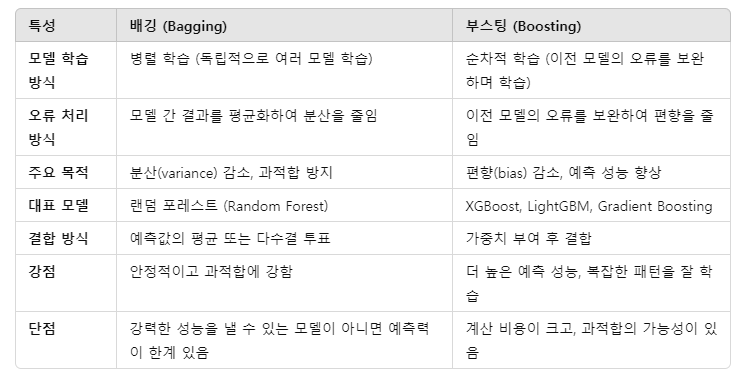

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(n_estimators = 1000, max_depth = 3, n_jobs = -1, random_state = 3, bootstrap = False)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.49      0.38      0.42       384
         1.0       0.54      0.65      0.59       434

    accuracy                           0.52       818
   macro avg       0.51      0.51      0.51       818
weighted avg       0.52      0.52      0.51       818



🔸 accuracy : 0.52 

#### ☑️ Bootstrap 부트스트랩 

시계열 데이터는 랜덤추출을 하면 안되기 때문에 bootstrap = False 로 꺼놔야 한다. 

### 일반화 성능 향상 및 하이퍼파라미터 튜닝

시계열데이터의 교차검증은 랜덤하게 하면 안되기 때문에 <br>
TimeSeriesSplit 함수를 사용해야 한다. 

In [40]:
from sklearn.model_selection import TimeSeriesSplit

In [41]:
ts_splited = TimeSeriesSplit(n_splits=5).split(X_train)

### 하이퍼파라미터 튜닝을 위한 GridSearch 분석
* GridSearch : GridSearch는 모델의 하이퍼파라미터 튜닝을 위한 방법 중 하나로, 특정 모델이 가장 잘 동작하는 최적의 하이퍼파라미터 조합을 찾는 데 사용된다. GridSearch는 사용자가 미리 정의한 여러 하이퍼파라미터 값들을 그리드 형태로 조합하여, 그중에서 가장 성능이 좋은 조합을 선택하는 방식이다.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
params = dict(bootstrap=[False], n_estimators=range(10, 200, 10), max_depth=[3, 5, 7, 9], 
             min_samples_leaf=[2,3,4,5], min_samples_split=[2,4,6,8,10], max_features=[4])

In [44]:
params

{'bootstrap': [False],
 'n_estimators': range(10, 200, 10),
 'max_depth': [3, 5, 7, 9],
 'min_samples_leaf': [2, 3, 4, 5],
 'min_samples_split': [2, 4, 6, 8, 10],
 'max_features': [4]}

In [45]:
# 최적의 하이퍼파라미터를 찾는 과정 

grid_cv = GridSearchCV(RandomForestClassifier(), param_grid = params, cv = ts_splited, n_jobs = -1)
grid_cv.fit(X_train, y_train)
print("best_params_ : ", grid_cv.best_params_)
print("best_score_ : ", grid_cv.best_score_)

best_params_ :  {'bootstrap': False, 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 110}
best_score_ :  0.5526813880126183


In [46]:
# 위에 나온 결과를 가지고 밑에 파라미터 바꾸기 

rfc = RandomForestClassifier(bootstrap=False, max_depth=3, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=40)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.48      0.36      0.41       384
         1.0       0.54      0.65      0.59       434

    accuracy                           0.52       818
   macro avg       0.51      0.51      0.50       818
weighted avg       0.51      0.52      0.51       818



🔸 accuracy : 0.51 

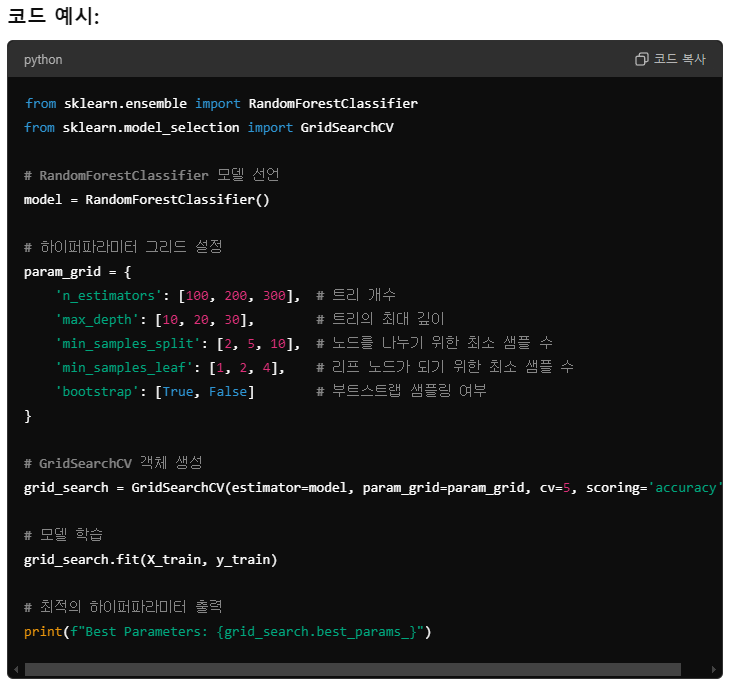

## 상승 하강 판단 기준 변경 후 재분석

In [47]:
data['pct_change'].describe()

count    2725.000000
mean        0.000271
std         0.013029
min        -0.098448
25%        -0.004321
50%         0.000545
75%         0.005791
max         0.128249
Name: pct_change, dtype: float64

#### 기준을 50% 중앙값인  0.000545 로 변경한다. 

- 50% 이상 : 1
- 50% 이하 : 0

In [48]:
data2 = data.copy()

In [49]:
data2.head(3)

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14,pct_change,target
Dates,,,,,,,,,,,,,,,,,,
2007-04-30,148.29,149.64,149.74,148.0,100874203.0,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720,-0.008293,1.0
2007-05-02,149.54,148.90,149.95,149.0,87129805.0,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288,0.008429,1.0
2007-05-03,150.35,149.97,150.40,149.0,87204945.0,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579,0.005417,1.0


In [50]:
data2['target'] = np.where(data['pct_change'] > 0.0005, 1, 0)
data2['target'].value_counts()


target
1    1375
0    1350
Name: count, dtype: int64

In [51]:
data2['target'] = data2['target'].shift(-1)
data2 = data2.dropna()

* shift(-1) 하는 이유? <br>
오늘 가격가지고 내일 가격을 예측해야 하기 때문이다.  

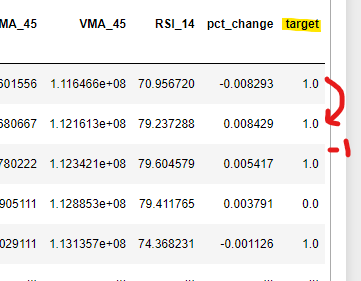

In [52]:
data2

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14,pct_change,target
Dates,,,,,,,,,,,,,,,,,,
2007-04-30,148.29,149.64,149.740,148.0,100874203.0,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,70.956720,-0.008293,1.0
2007-05-02,149.54,148.90,149.950,149.0,87129805.0,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,79.237288,0.008429,1.0
2007-05-03,150.35,149.97,150.400,149.0,87204945.0,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,79.604579,0.005417,1.0
2007-05-04,150.92,150.75,151.120,150.0,96408930.0,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,79.411765,0.003791,0.0
2007-05-08,150.75,150.58,150.920,150.0,80583938.0,67.88,83.3700,2.3913,0.60,48.64,24.73,13.21,42.360,144.029111,1.131357e+08,74.368231,-0.001126,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-17,255.36,259.40,260.650,254.0,165492297.0,117.87,84.7300,1.8149,0.44,10.45,25.97,24.52,38.290,270.872000,1.238587e+08,35.093320,-0.019618,0.0
2018-12-19,251.26,255.17,259.400,249.0,214992797.0,117.43,84.8300,1.7824,0.44,10.02,25.97,25.58,37.890,270.407333,1.225288e+08,30.487250,-0.016056,0.0
2018-12-20,247.17,249.86,251.620,245.0,252053406.0,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,17.236433,-0.016278,0.0


In [53]:
X2 = data2.drop(['CLOSE_SPY', 'OPEN', 'HIGH', 'LOW', 'VOLUME','pct_change','target'], axis=1)
y2 = data2['target']

In [54]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, shuffle=False, random_state=3)

# shuffle=False: 데이터를 섞지 않겠다는 의미
# 시계열 데이터에서는 데이터가 시간에 따라 순서가 있기 때문에 섞지 않고 순서대로 나누는 것이 일반적

In [55]:
ts_splited2 = TimeSeriesSplit(n_splits=5).split(X2_train)

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
params = dict(bootstrap=[False], n_estimators=range(10, 200, 10), max_depth=[3, 5, 7, 9], 
             min_samples_leaf=[2,3,4,5], min_samples_split=[2,4,6,8,10], max_features=[4], random_state=[10])

In [58]:
params 

{'bootstrap': [False],
 'n_estimators': range(10, 200, 10),
 'max_depth': [3, 5, 7, 9],
 'min_samples_leaf': [2, 3, 4, 5],
 'min_samples_split': [2, 4, 6, 8, 10],
 'max_features': [4],
 'random_state': [10]}

In [59]:
# 최적의 하이퍼파라미터를 찾는 과정 

grid_cv = GridSearchCV(RandomForestClassifier(), param_grid = params, cv = ts_splited2, n_jobs = -1)
grid_cv.fit(X2_train, y2_train)
print("best_params_ : ", grid_cv.best_params_)
print("best_score_ : ", grid_cv.best_score_)

best_params_ :  {'bootstrap': False, 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30, 'random_state': 10}
best_score_ :  0.5293375394321768


In [61]:
# 위에 나온 결과를 가지고 밑에 파라미터 바꾸기 

rfc = RandomForestClassifier(bootstrap=False, max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=2, n_estimators=30, random_state=10)
rfc.fit(X2_train, y2_train)
pred = rfc.predict(X2_test)
print(classification_report(y2_test, pred))

              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59       415
         1.0       0.53      0.38      0.44       403

    accuracy                           0.53       818
   macro avg       0.53      0.53      0.52       818
weighted avg       0.53      0.53      0.52       818

